# Comparison of truncated normal implementations.

In [1]:
import scipy.stats
import numpy as np
import sys
import matplotlib.pylab as plt

In [2]:
K = 10000
z1 = np.zeros(K)
z2 = np.zeros(K)
z3 = np.zeros(K)


a = -np.inf
# b = -10 breaks manual implementation ... 
b = 0
loc = 0
scale = 1

CPU times: user 2.06 s, sys: 44.2 ms, total: 2.1 s
Wall time: 2.07 s


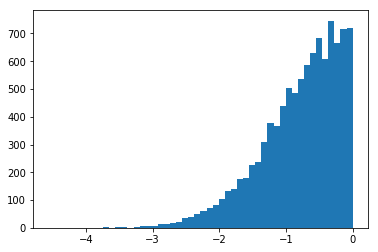

In [3]:
%%time
for i in range(K):
    a_m, b_m = (a - loc) / scale, (b - loc) / scale
    u = np.random.uniform(0, 1)
    cdf_a = scipy.stats.norm.cdf(-a_m)
    cdf_b = scipy.stats.norm.cdf(-b_m)
    z = -scipy.stats.norm.ppf(cdf_a - (cdf_a - cdf_b)*u)
    z1[i] = z*scale+loc
x = plt.hist(z1, bins=50)

CPU times: user 682 ms, sys: 39.2 ms, total: 721 ms
Wall time: 691 ms


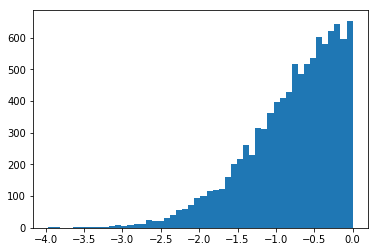

In [4]:
%%time
for i in range(K):
    a_m, b_m = (a - loc) / scale, (b - loc) / scale
    z2[i] = scipy.stats.truncnorm.rvs(a=a_m, b=b_m, scale=scale, loc=loc)
x = plt.hist(z2, bins=50)